In [21]:

import torch
from time import time
from DocBuilder.utils import split_list_to_batch, restore_batched_list, unbind_sparse, top_k_sparse, tensor_retuen_type
from DocBuilder.Retriever_k_means import cluster_builder
import matplotlib.pyplot as plt
import numpy as np

1418


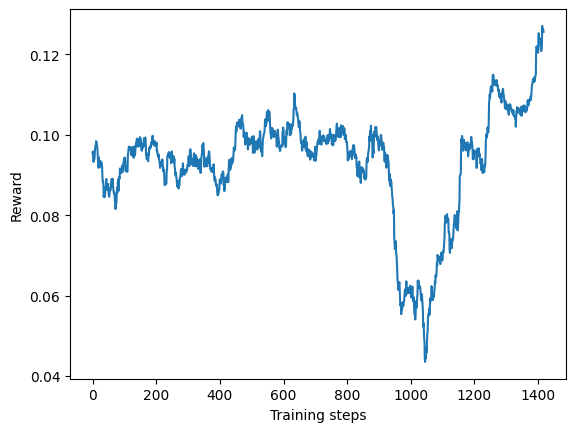

In [72]:

with open("reward_number.txt", "r") as f:
    r = f.readlines()
r = [float(i) for i in r][:]
print(len(r))
moving_avg = []
ma = np.mean(r[:500])
ratio=1-20/len(r)
for x in r:
    ma = ratio * ma + (1-ratio) * x
    moving_avg.append(ma)

plt.ylabel("Reward")
plt.xlabel("Training steps")
plt.plot(moving_avg)
plt.show()

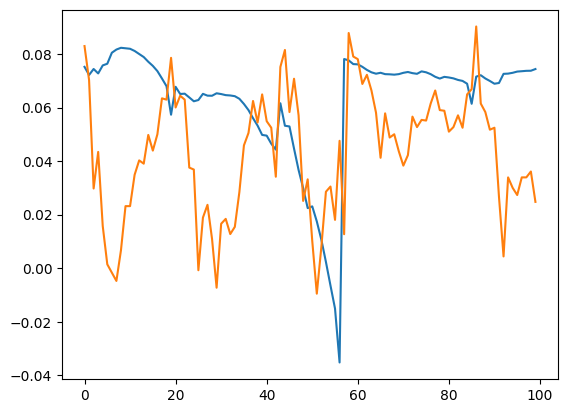

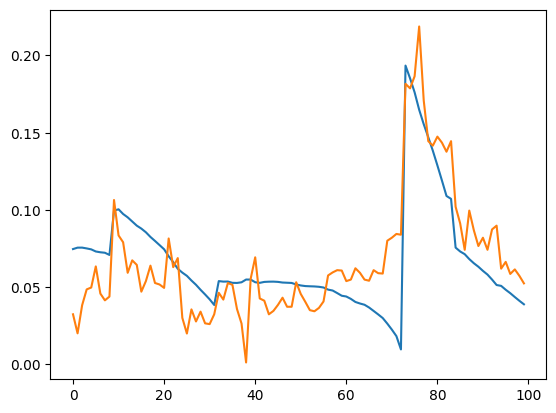

In [73]:
returns = torch.load("save/return.pt")
value = torch.load("save/value.pt")
plt.plot(returns[:100])
plt.plot(value[:100])
plt.show()
plt.plot(returns[100:200])
plt.plot(value[100:200])
plt.show()

In [44]:
from LM.llama_reader import LLaMa_reader
import config
from metric.reward import Bert_score
g_config= config.generate_config
g_config.temperature=0.1
model = LLaMa_reader(config.LM_dir, device="cuda:1",generate_config=g_config)

Loading checkpoint shards: 100%|██████████| 3/3 [00:03<00:00,  1.25s/it]

["\nson Sav\nbornarch 2, 1931 -June 2, 1013) was an American actor best film person, best commonly for his port as Young young George Bailey in the's a Wonderful Life ("]


(tensor(0.6838),)

In [166]:

# output = model.generate("hello", max_new_tokens=20)
messages = "who is young george bailey in it's a wonderful life"
y = "Robert James Anderson (March 6, 1933--June 6, 2008) was an American actor and television producer, most famous for his role as the young George Bailey in It's a Wonderful Life."
response = model.pseudo_generate(messages, y, temperture=0.2, return_prob=False, decode=True)
print(response)
Bert_score([y], response)

["\nson Brad\nbornarch 2, 1939 -June 2, 1013) was an American actor best film person. best famous for his role as Young young George Bailey in the's a Wonderful Life ("]


(tensor(0.7152),)

In [8]:
token, prob = model.pseudo_generate("hello!","I'm Amber and I'm so glad you're here!", temperture=0.5,return_prob=True)

In [46]:

from transformers import BertModel, BertConfig, BertTokenizer, RobertaModel, RobertaTokenizer, RobertaForMaskedLM
import config, torch
bert = RobertaModel.from_pretrained(config.roberta_dir, torch_dtype=torch.bfloat16).to(torch.bfloat16)
print(bert)
embedding = bert.roberta.embeddings.position_embeddings
new_embedding = torch.nn.Embedding(1026, embedding.embedding_dim, dtype = torch.bfloat16)
new_embedding.weight.data[:len(embedding.weight),:]=embedding.weight.data
bert.roberta.embeddings.position_embeddings = new_embedding

bert.roberta.embeddings.register_buffer(
    "position_ids", torch.arange(1026).expand((1, -1)), persistent=False
)
bert.roberta.embeddings.register_buffer(
    "token_type_ids", torch.zeros(bert.roberta.embeddings.position_ids.size(), dtype=torch.long), persistent=False
)
tokenizer = RobertaTokenizer.from_pretrained(config.roberta_dir)
t=tokenizer("".join([" retrieve"," proceed"," rewrite"]*300), return_tensors="pt")
bert(**t)

Some weights of RobertaModel were not initialized from the model checkpoint at huggingface/roberta_head/ and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaModel(
  (embeddings): RobertaEmbeddings(
    (word_embeddings): Embedding(50265, 768, padding_idx=1)
    (position_embeddings): Embedding(514, 768, padding_idx=1)
    (token_type_embeddings): Embedding(1, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): RobertaEncoder(
    (layer): ModuleList(
      (0-11): 12 x RobertaLayer(
        (attention): RobertaAttention(
          (self): RobertaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): RobertaSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (dropou

AttributeError: 'RobertaModel' object has no attribute 'roberta'

In [1]:
from metric import reward


/root/miniconda3/envs/RR/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/root/miniconda3/envs/RR/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


KeyboardInterrupt: 

In [5]:

score = reward.ROUGE_score(["abcd "*768]*100*20,["defg "*768]*100*20)
print(score)

KeyboardInterrupt: 

In [4]:

score = reward.BLEU_score(["abcd "*768]*100*20,["defg "*768]*100*20)
print(score)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 